# Youtube data analysis
Analisaremos la informacion de youtube en Gran Bretra;analysis

## Set Up
### Importar Librerias

In [77]:
import numpy as np
import pandas as pd
import json
%matplotlib inline

import seaborn as sns
from matplotlib import pyplot as plt

### Hoja de estilos

In [80]:
pd.options.display.float_format = '{:.2f}'.format # format floats to 2 decimal places in output

sns.set(style="ticks")
plt.style.use("dark_background")
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41',  # matrix green
]


### Cargar datos

In [51]:
df = pd.read_csv('data/GBvideos_cc50.csv')

### Inspeccionar los datos

In [13]:
# Ver las primeras columnas de datos
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Devon,50.700405,-3.529950,POINT (-3.529950197 50.70040529)
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,Manchester,53.500415,-2.247987,POINT (-2.247987103 53.50041526)
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Bath And North East Somerset,51.383749,-2.350022,POINT (-2.350022218 51.3837486)
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Aberdeen,57.170398,-2.079987,POINT (-2.079987021 57.17039797)
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,Southampton,50.900031,-1.399977,POINT (-1.399976849 50.90003135)


In [14]:
# Informacion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                38916 non-null  object 
 1   trending_date           38916 non-null  object 
 2   title                   38916 non-null  object 
 3   channel_title           38916 non-null  object 
 4   category_id             38916 non-null  int64  
 5   publish_time            38916 non-null  object 
 6   tags                    38916 non-null  object 
 7   views                   38916 non-null  int64  
 8   likes                   38916 non-null  int64  
 9   dislikes                38916 non-null  int64  
 10  comment_count           38916 non-null  int64  
 11  thumbnail_link          38916 non-null  object 
 12  comments_disabled       38916 non-null  bool   
 13  ratings_disabled        38916 non-null  bool   
 14  video_error_or_removed  38916 non-null

Podemos ver que el dataset tiene `38.916` elementos. Y tambien se evidencia que todas las columnas estan completas a excepcion de la `description` pues muestra `38.304` valores. 

In [23]:
# Visualizar la informacion estadistica del dataframe
df.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,38916.00,38916.00,38916.00,38916.00,38916.00,38916.00,38916.00
mean,16.83,5911943.63,134519.55,7612.56,13088.35,53.38,-2.38
std,7.75,19001209.95,349989.31,50956.83,50667.40,2.04,2.10
min,1.00,851.00,0.00,0.00,0.00,50.13,-7.33
25%,10.00,251527.25,5897.00,200.00,679.00,51.50,-3.53
50%,20.00,981889.00,25182.50,821.00,2478.00,53.20,-2.18
75%,24.00,3683628.50,114089.25,3357.50,9241.50,54.88,-1.08
max,43.00,424538912.00,5613827.00,1944971.00,1626501.00,58.97,1.30


Podemos analizar en esta tabla:
* En promedio un video en trending tiene `5.911.943` vistas. La media para la vistas es `981.889` es decir, el 50% de los videos tienen mas de este valor y el otro tiene menos. 
* El promedio de comentarios en estos video son `13.088` y la media es `2.478` 
* En promedio videos en tendencias tienen en promedio `134.519` me gustas y `7.612` no me gusta.

## Pre-procesar los datos

### Modificar valores vacios

Como mostramos previamente, la columna `description` contiene algunos valores nulos. Por ello debemos verificar y limpiar estas columnas antes de analizar el dataset. 

In [19]:
df[df["description"].apply(lambda x: pd.isna(x))].head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
91,_wM_jY_rass,17.14.11,Bone on Labour HQ,Ross Kempsell,25,2017-11-06T16:12:58.000Z,[none],159065,1160,1164,0,https://i.ytimg.com/vi/_wM_jY_rass/default.jpg,True,False,False,NaN,Bristol,51.449998,-2.583315,POINT (-2.583315472 51.44999778)
118,8HON4AswPVk,17.14.11,Arvo Pärt - Tabula Rasa,JSaxofone,10,2012-09-13T12:35:46.000Z,"Arvo|""Pärt""|""Tabula""|""Rasa""|""part""|""violin""|""c...",728177,4007,71,240,https://i.ytimg.com/vi/8HON4AswPVk/default.jpg,False,False,False,NaN,Dungannon,54.520379,-6.670017,POINT (-6.670016929 54.52037884)


Para no dejar estos valores como `NA`, es mejor cambiar estoys valores a cadenas vacias.

In [21]:
df["description"] = df["description"].fillna(value="") # Fillna con vacio

### Completar informacion de categorias

Antes de analizar los datos y para facilitar la visualizacion de datos, uniremos los valores de `category_id` con su representacion en el archivo `GB_category_id.json`. De esta forma no podremos colocar numbero en lugar

In [57]:
df['category_id'].head(2)

0    26
1    24
Name: category_id, dtype: int64

In [58]:
with open("data/GB_category_id.json") as f:
    categories = json.load(f)["items"]
    
cat_dict = {}
for cat in categories:
    cat_id = int(cat["id"])
    cat_dict[cat_id] = cat["snippet"]["title"]
    
df['category_name'] = df['category_id'].map(cat_dict)

### Modificar tipos
Modificar los tipos de las fechas a 

In [52]:
df['publish_hour'] = pd.to_datetime(df["publish_time"]).dt.time
df['publish_time'] = pd.to_datetime(df["publish_time"]).dt.date
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%M').dt.date


## Visualizar los datos
### Categorias de Videos
#### ¿Qué categorías de videos son las de mayor tendencia?

NameError: name 'color' is not defined

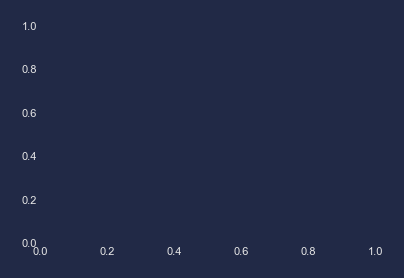

In [81]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)

fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=colors, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
_ = ax.set(xlabel="Categoria", ylabel="No. de videos")

Es claro que la categoria de Musica es la que continue la mayo